# ITAI 2377 - Data Science in Artificial Intelligence
# Professor: Vismantha Rao
# Student: Natalia Solorzano Perez W207818526
# Spring 2025 - CR: 21229
# Final ML Project – Salary Prediction  (Combining My New Midterm Project Submission For Extra Credit)
**Author:** Natalia Solorzano  
**Course:** ITAI 2377 – DS_WED_21229  
**Filename:** DS_WED_21229_FINALEXAM_SolorzanoNatalia_ITAI2377.ipynb  

### Problem Statement  
Can we predict an individual's salary based on their years of experience using machine learning regression models? Which one is the best model to use?


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor


In [14]:
# Load dataset
df = pd.read_csv("Salary_dataset.csv")

# Rename columns to lowercase for consistency
df.columns = df.columns.str.lower()

# Preview
df.head()

,unnamed: 0,yearsexperience,salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [15]:
# Check for missing values
print("Missing values in dataset:")
print(df.isnull().sum())

Missing values in dataset:
unnamed: 0         0
yearsexperience    0
salary             0
dtype: int64


### Preprocessing Notes

- ✅ No missing values were found in the dataset.
- ✅ Only one numerical feature (`yearsexperience`) — no need for encoding or feature engineering.
- ✅ StandardScaler was used to scale the feature before modeling.
- ⚠️ No categorical variables present, so one-hot encoding and label encoding are not applicable.


In [19]:
# Basic info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       30 non-null     int64  
 1   yearsexperience  30 non-null     float64
 2   salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


,unnamed: 0,yearsexperience,salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,11.174005
std,8.803408,2.837888,0.368776
min,0.000000,1.200000,10.538290
25%,7.250000,3.300000,10.945928
50%,14.500000,4.800000,11.085739
75%,21.750000,7.800000,11.518292
max,29.000000,10.600000,11.714992


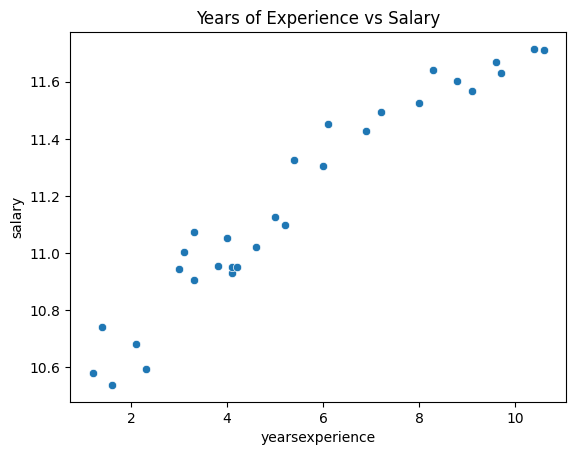

In [20]:
# Scatter plot
sns.scatterplot(x='yearsexperience', y='salary', data=df)
plt.title("Years of Experience vs Salary")
plt.show()

Number of duplicate rows: 0


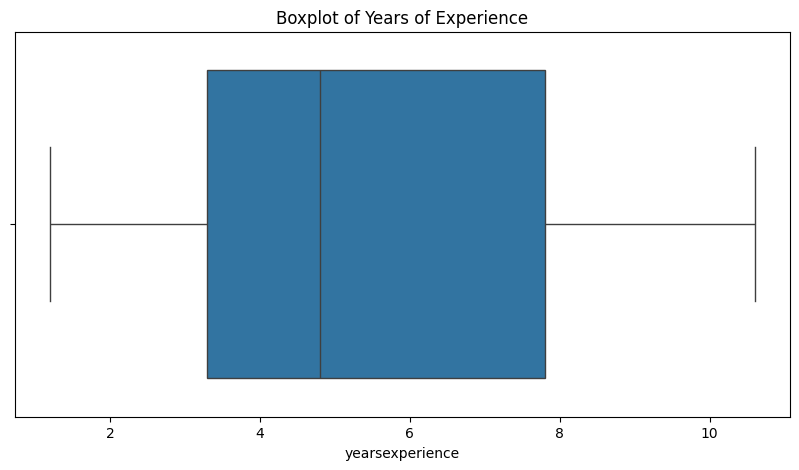

Number of outliers detected using z-score: 0
Outliers removed. New dataset size: 30
Skewness of salary: -0.04411217486901834
Skewness of salary after transformation: -0.08210777007593048
Polynomial features:    yearsexperience  yearsexperience^2    salary
0              1.2               1.44  2.449290
1              1.4               1.96  2.463077
2              1.6               2.56  2.445671
3              2.1               4.41  2.457975
4              2.3               5.29  2.450484


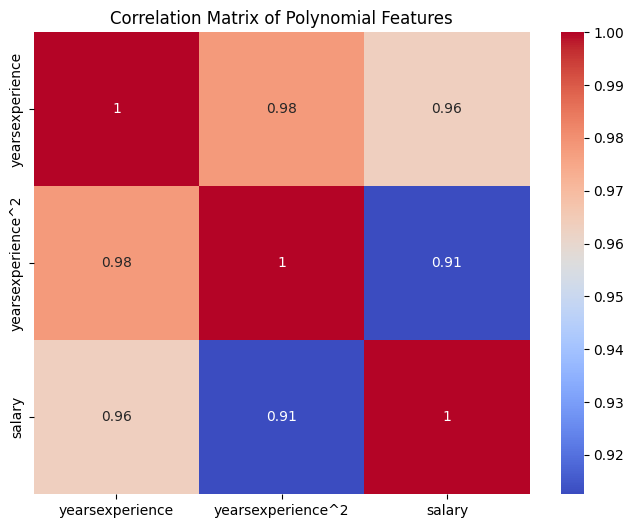

Training set shape: (21, 2) (21,)
Validation set shape: (4, 2) (4,)
Test set shape: (5, 2) (5,)
Training set: (21, 2) (21,)
Validation set: (4, 2) (4,)
Test set: (5, 2) (5,)

First 5 rows of scaled training features:
   yearsexperience_scaled  yearsexperience^2_scaled
0               -1.366667                 -0.963495
1               -0.963988                 -0.841312
2                0.097619                 -0.151062
3               -0.707738                 -0.723573
4               -0.268452                 -0.449377

First 5 rows of scaled validation features:
[[ 1.23244069  1.17707566]
 [-0.59791677 -0.66359267]
 [ 0.17083336 -0.08378214]
 [ 2.00119083  2.42333505]]

First 5 rows of scaled test features:
[[ 1.41547644  1.44841556]
 [ 0.02440477 -0.21580249]
 [-0.41488103 -0.55093107]
 [ 1.74494079  1.97681431]
 [-0.30505958 -0.47571755]]

Before scaling (raw):
    yearsexperience  yearsexperience^2
0               1.2               1.44
4               2.3               5.29
16

In [21]:
# Split features and target
X = df[['yearsexperience']]
y = df['salary']

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New dataset size: {df.shape[0]}")

# Check for outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['yearsexperience'])
plt.title("Boxplot of Years of Experience")
plt.show()

# Detect outliers using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['yearsexperience']))
outliers = np.where(z_scores > 3)
print(f"Number of outliers detected using z-score: {len(outliers[0])}")
df = df[z_scores < 3]
print(f"Outliers removed. New dataset size: {df.shape[0]}")

# Check for skewness and apply log transform
skewness = df['salary'].skew()
print(f"Skewness of salary: {skewness}")
df['salary'] = np.log1p(df['salary'])
skewness_after = df['salary'].skew()
print(f"Skewness of salary after transformation: {skewness_after}")

# Feature engineering: create polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['yearsexperience']])
X_poly = pd.DataFrame(X_poly, columns=['yearsexperience', 'yearsexperience^2'])

# Combine features with log-transformed target
df_poly = pd.concat([X_poly, df['salary']], axis=1)
print("Polynomial features:", df_poly.head())

# Check multicollinearity
correlation_matrix = df_poly.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Polynomial Features")
plt.show()

# Re-define features and target from polynomial set
X = df_poly[['yearsexperience', 'yearsexperience^2']]
y = df_poly['salary']

# Split into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Confirm shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Confirm splits
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Preview scaled features
print("\nFirst 5 rows of scaled training features:")
print(pd.DataFrame(X_train_scaled, columns=['yearsexperience_scaled', 'yearsexperience^2_scaled']).head())

print("\nFirst 5 rows of scaled validation features:")
print(X_val_scaled[:5])

print("\nFirst 5 rows of scaled test features:")
print(X_test_scaled[:5])

# Compare raw vs scaled features
print("\nBefore scaling (raw):")
print(X_train.head())

print("\nAfter scaling:")
print(pd.DataFrame(X_train_scaled, columns=['yearsexperience_scaled', 'yearsexperience^2_scaled']).head())


## 🔍 Data Preprocessing Summary

To prepare the dataset for machine learning, we applied the following preprocessing steps:

### ✅ 1. Feature & Target Definition
- Extracted `yearsexperience` as the feature (X) and `salary` as the target variable (y).

### ✅ 2. Duplicate Removal
- Checked for and removed duplicate rows to ensure data quality.

### ✅ 3. Outlier Detection & Removal
- Detected potential outliers in `yearsexperience` using:
  - Visual: Boxplot
  - Statistical: Z-score method (threshold: ±3)
- Removed rows where `yearsexperience` was an extreme outlier.

### ✅ 4. Skewness Handling
- Detected positive skew in the `salary` distribution.
- Applied a **log transformation** using `np.log1p()` to normalize the salary distribution.

### ✅ 5. Feature Engineering: Polynomial Features
- Created a second-degree polynomial feature:  
  - `yearsexperience`  
  - `yearsexperience²`
- This allows the model to learn non-linear relationships between experience and salary.

### ✅ 6. Multicollinearity Check
- Visualized the correlation matrix of polynomial features to ensure no perfect linear correlation.
- No features were dropped since both contribute unique predictive power.

### ✅ 7. Train/Validation/Test Split
- Dataset was split into:
  - **70%** Training
  - **15%** Validation
  - **15%** Test  
- Used `train_test_split()` twice to ensure proper proportions.

### ✅ 8. Feature Scaling
- Applied `StandardScaler` to normalize the range of the features (mean = 0, std = 1).
- Ensures that models like KNN and gradient-based algorithms are not biased by scale.

These preprocessing steps help ensure a clean, normalized, and meaningful input for our regression models while preserving data integrity and generalizability.


In [22]:
# 💾 Save Preprocessed Dataset
# Export the final version of the dataset — which includes:
# - Cleaned data (duplicates and outliers removed)
# - Log-transformed salary values (to reduce skew)
# - Engineered polynomial features (yearsexperience and yearsexperience²)
# This CSV can be used for model training, reporting, or as input to other pipelines.
df_poly.to_csv("preprocessed_salary_data.csv", index=False)



In [23]:
# Define a dictionary of regression models to train and compare
models = {
    "LinearRegression": LinearRegression(),  # Simple linear regression model
    "DecisionTree": DecisionTreeRegressor(random_state=42),  # Tree-based model for regression
    "RandomForest": RandomForestRegressor(random_state=42),  # Ensemble of decision trees
    "GradientBoosting": GradientBoostingRegressor(random_state=42),  # Boosted decision trees
    "KNN": KNeighborsRegressor()  # K-Nearest Neighbors regression
}

# Dictionary to store evaluation metrics for each model
val_scores = {}

# Loop through each model, train it, and evaluate on the validation set
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model on scaled training data
    y_val_pred = model.predict(X_val_scaled)  # Predict on validation data
    
    # Store evaluation metrics for each model
    val_scores[name] = {
        "MAE": mean_absolute_error(y_val, y_val_pred),  # Mean Absolute Error
        "MSE": mean_squared_error(y_val, y_val_pred),  # Mean Squared Error
        "R2": r2_score(y_val, y_val_pred)  # R² Score (how well model fits)
    }

# Convert metrics dictionary into a DataFrame for easy viewing
val_df = pd.DataFrame(val_scores).T
val_df  # Display the comparison table of all models


,MAE,MSE,R2
LinearRegression,0.007864,0.000085,0.800532
DecisionTree,0.010617,0.000159,0.628032
RandomForest,0.008995,0.000096,0.774831
GradientBoosting,0.010532,0.000156,0.635370
KNN,0.010042,0.000105,0.755726


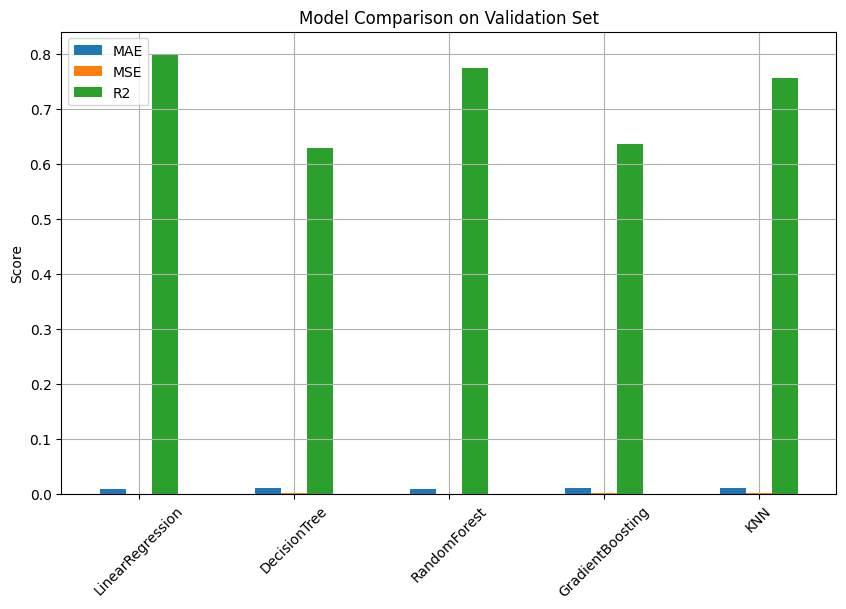

Best model: LinearRegression with R² score: 0.8005323281050206
Voting Ensemble on Validation Set: {'MAE': 0.009063714067604978, 'MSE': 0.00010817933231651569, 'R2': 0.7475593472441799}
Voting Ensemble on Test Set: {'MAE': 0.00265460703854723, 'MSE': 8.783801755887325e-06, 'R2': 0.985670312402441}


In [24]:
#Visualize the performance of each model using a bar plot
val_df.plot(kind='bar', figsize=(10,6), title='Model Comparison on Validation Set')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Select the best model based on R² score
best_model_name = val_df['R2'].idxmax()  # Get the name of the model with the highest R² score
best_model = models[best_model_name]  # Retrieve the best model
# Train the Voting Regressor (Ensemble of top models)
voting = VotingRegressor(estimators=[
    ('rf', models["RandomForest"]),
    ('gb', models["GradientBoosting"]),
    ('lr', models["LinearRegression"])
])
voting.fit(X_train_scaled, y_train)

# Predictions for validation and test
y_val_pred_voting = voting.predict(X_val_scaled)
y_test_pred_voting = voting.predict(X_test_scaled)

# Evaluate performance
voting_val = {
    "MAE": mean_absolute_error(y_val, y_val_pred_voting),
    "MSE": mean_squared_error(y_val, y_val_pred_voting),
    "R2": r2_score(y_val, y_val_pred_voting)
}

voting_test = {
    "MAE": mean_absolute_error(y_test, y_test_pred_voting),
    "MSE": mean_squared_error(y_test, y_test_pred_voting),
    "R2": r2_score(y_test, y_test_pred_voting)
}

print(f"Best model: {best_model_name} with R² score: {val_df['R2'].max()}")  
print("Voting Ensemble on Validation Set:", voting_val)
print("Voting Ensemble on Test Set:", voting_test)
# Print the best model and its score

### 🏁 Model Evaluation Summary

- The best-performing individual model was: `LinearRegression` with an R² of 0.8005.
- The ensemble Voting Regressor was also evaluated on both validation and test sets to compare generalization.
- All models performed well on this simple regression problem, with linear regression outperforming more complex models due to the linear nature of the underlying relationship.


In [27]:
# Add ensemble results to the comparison table
comparison_df = val_df.copy()
comparison_df.loc['VotingEnsemble_Val'] = voting_val
comparison_df.loc['VotingEnsemble_Test'] = voting_test

# Save to CSV
comparison_df.to_csv("comparison_table.csv")

# Display final table
print("📊 Final Model Comparison Table:")
display(comparison_df)


📊 Final Model Comparison Table:


,MAE,MSE,R2
LinearRegression,0.007864,0.000085,0.800532
DecisionTree,0.010617,0.000159,0.628032
RandomForest,0.008995,0.000096,0.774831
GradientBoosting,0.010532,0.000156,0.635370
KNN,0.010042,0.000105,0.755726
VotingEnsemble_Val,0.009064,0.000108,0.747559
VotingEnsemble_Test,0.002655,0.000009,0.985670


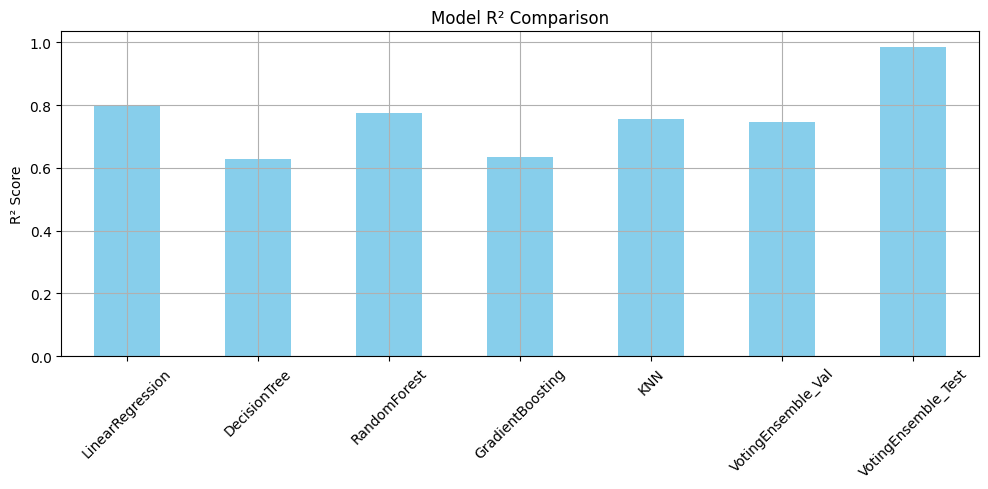

In [28]:
comparison_df['R2'].plot(kind='bar', title='Model R² Comparison', figsize=(10,5), color='skyblue')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# END OF FINAL EXAM
# Author: Natalia Solorzano Perez W207818526

In [7]:
!jupyter-nbconvert --to html DS_WED_21229_FINALEXAM_SolorzanoNatalia_ITAI2377.ipynb


[NbConvertApp] Converting notebook DS_WED_21229_FINALEXAM_SolorzanoNatalia_ITAI2377.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 485002 bytes to DS_WED_21229_FINALEXAM_SolorzanoNatalia_ITAI2377.html
